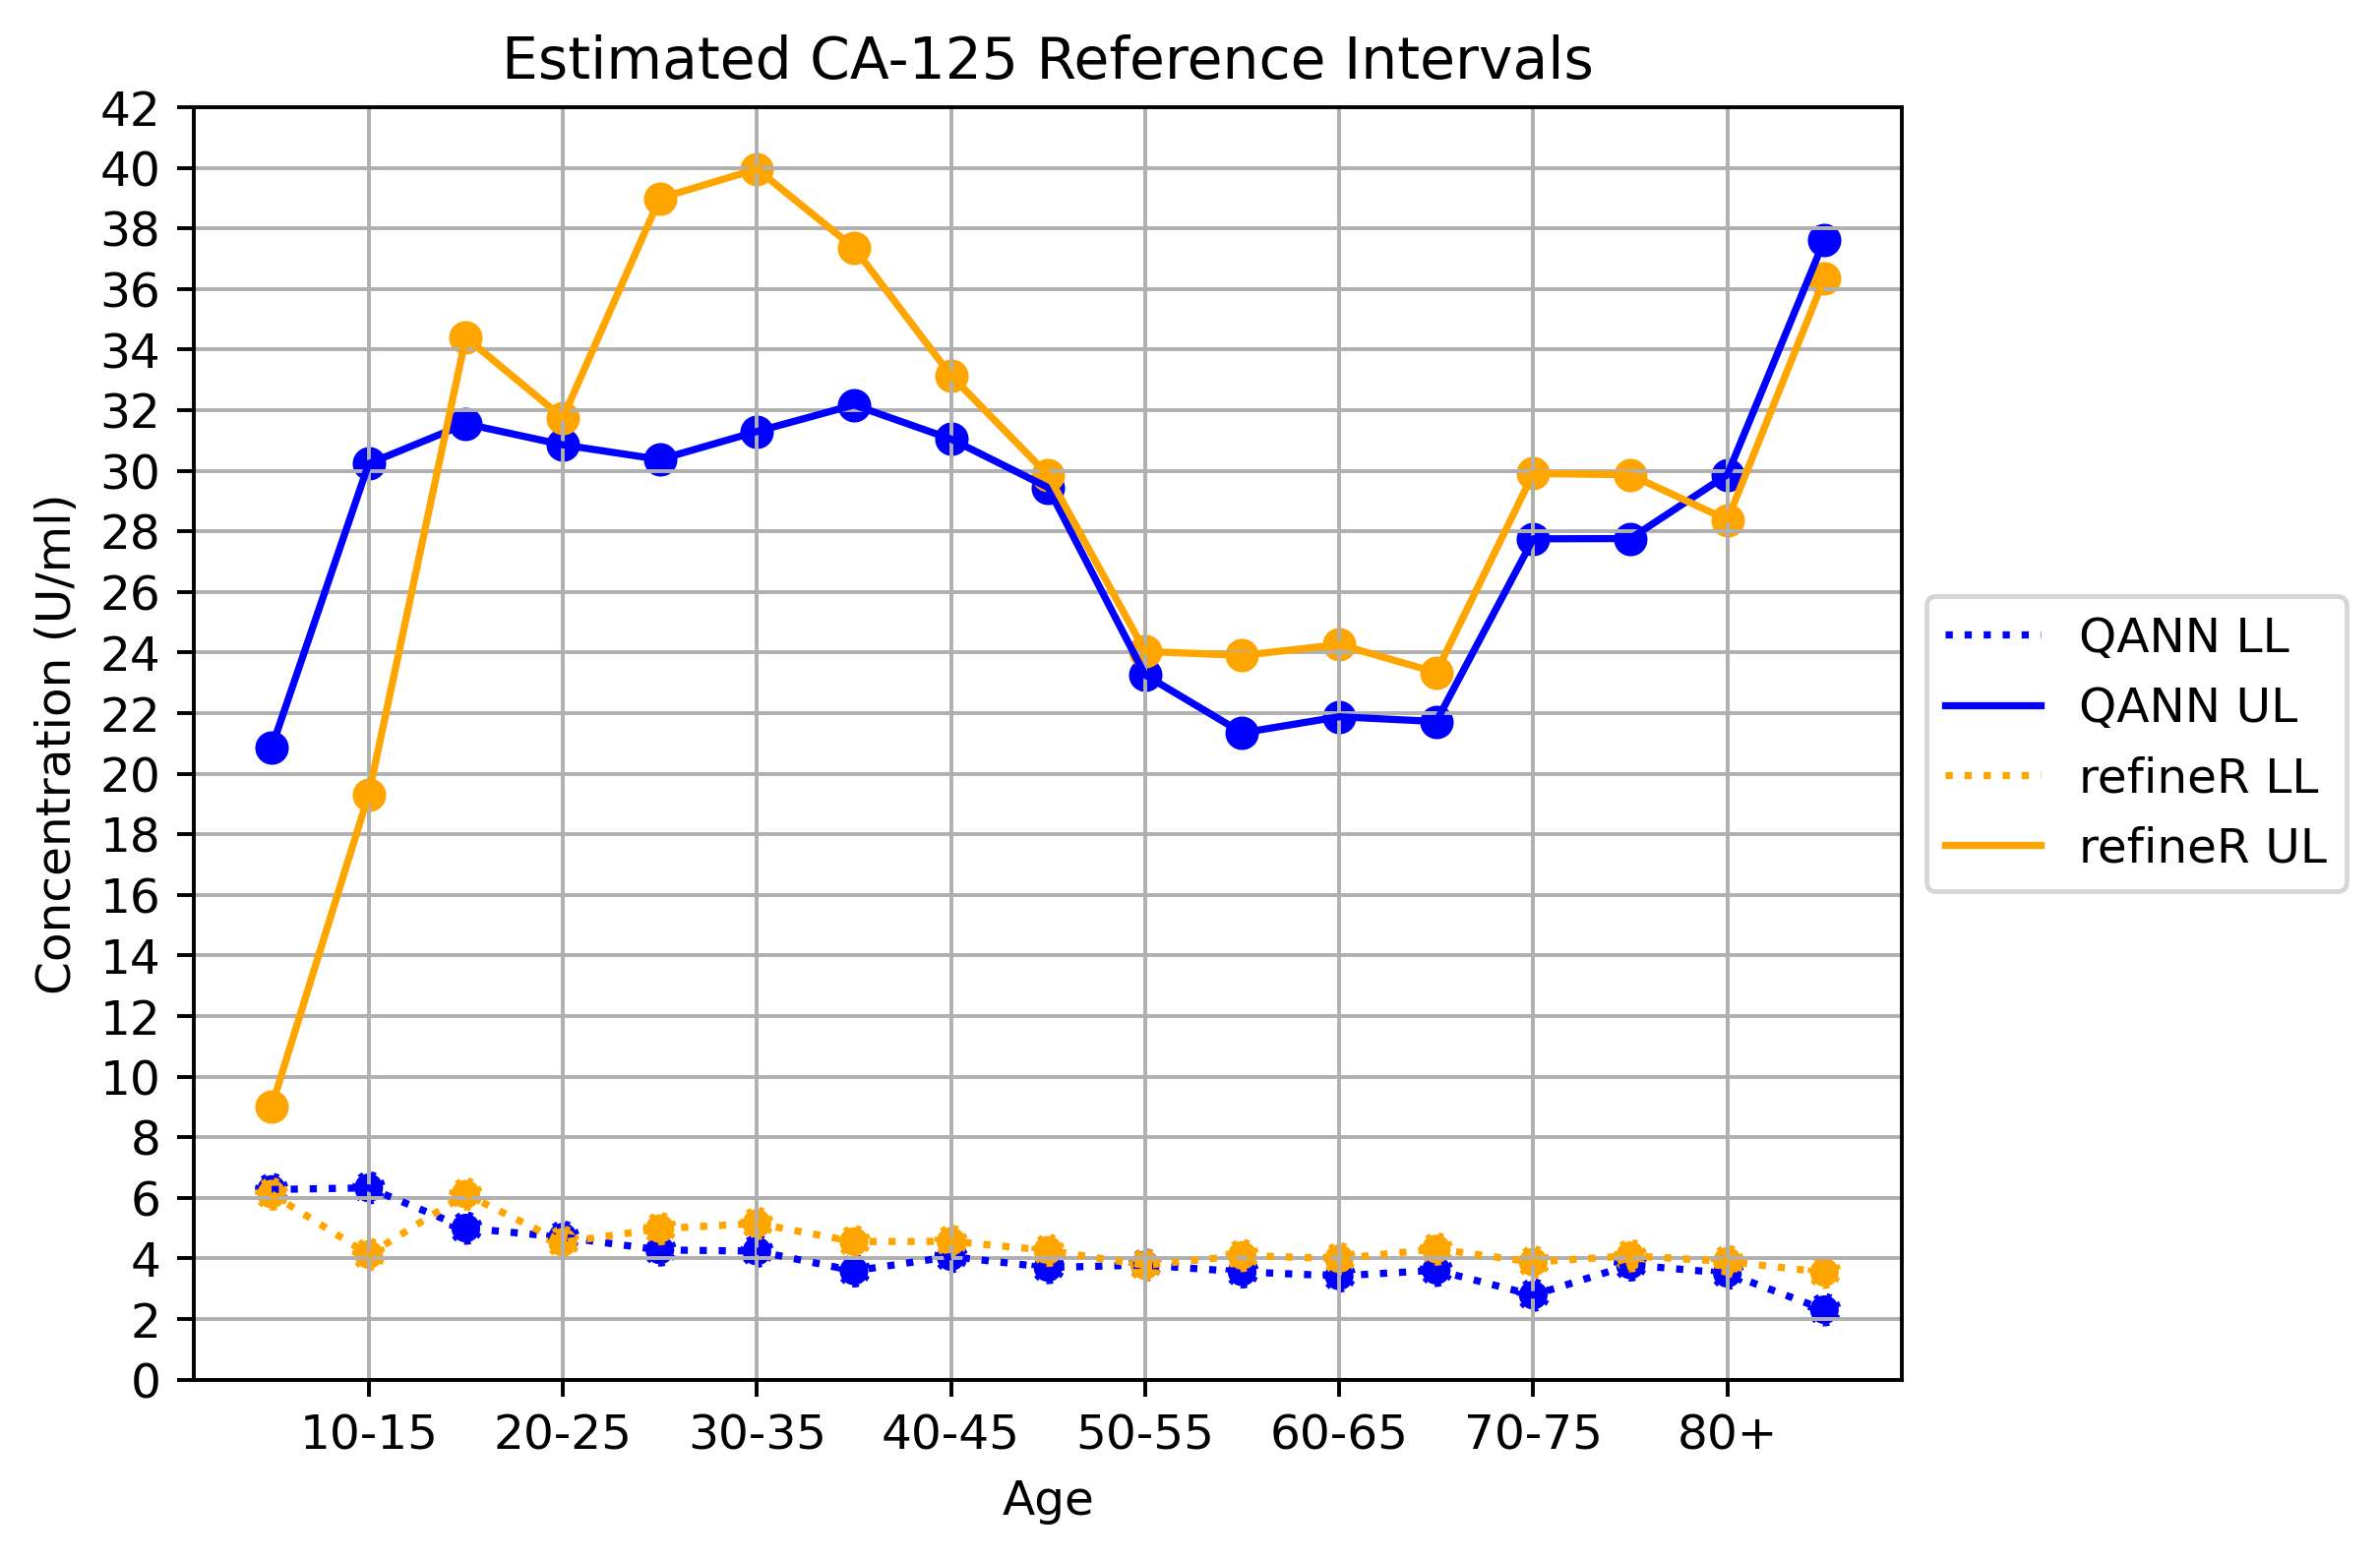

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load QANN predictions
ris_nn = np.load('./predictions_by_age.npy')
prediction_ages = np.load('./prediction_age_groups.npy')

# load refineR predictions
df = pd.read_csv('../../../refineR/cancer_ag125/refineR_results_F_2param.csv')
# df = pd.read_csv('../../../refineR/cancer_ag125/refineR_results_2param.csv')
df['age_group'] = [i[1].file.split('value_')[1].split('.')[0] for i in df.iterrows()]
df.age_group = pd.to_numeric(df.age_group)
df = df.sort_values(by='age_group', ascending=True)

# plot age-dependent ris_nn
plt.figure(dpi=350)
plt.plot(prediction_ages, [i[0][0] for i in ris_nn], label='QANN LL', c='b', linestyle=':');
plt.plot(prediction_ages, [i[0][1] for i in ris_nn], label='QANN UL', c='b');
plt.plot(df.age_group, df.ll, label='refineR LL', c='orange', linestyle=':');
plt.plot(df.age_group, df.ul, label='refineR UL', c='orange')
plt.scatter(prediction_ages, [i[0][0] for i in ris_nn], c='b', linestyle=':');
plt.scatter(prediction_ages, [i[0][1] for i in ris_nn], c='b');
plt.scatter(df.age_group, df.ll, c='orange', linestyle=':');
plt.scatter(df.age_group, df.ul, c='orange')
plt.grid()
plt.ylim([0, 40]);
plt.ylabel('Concentration (U/ml)')
plt.xlabel('Age')
plt.title('Estimated CA-125 Reference Intervals');

# add a legend outside to the right of the axes
legend = plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().set_yticks(np.arange(0, 44, 2));
plt.gca().set_xticks(np.arange(10, 90, 10));
plt.gca().set_xticklabels(['10-15','20-25','30-35','40-45','50-55','60-65','70-75','80+']);

